# Name : Mike Mico
StdID: 3685120



In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# limit column display size, so we don't have to scroll endlessly
pd.set_option('display.max_columns', 100)

# display plots inline
%matplotlib inline

In [2]:
# read the csv - note there are also options for reading txt or xls files - google is your friend
df = pd.read_csv("Company_ad_buys_and_sales.csv")

In [28]:
# create list X - TV
X = df.iloc[:, 0:1].values

# create list y - Sales
y = df.iloc[:, 3].values
# Linear regression with scikit-learn

# import the library
from sklearn.linear_model import LinearRegression

# create an instance of the linear regression class
lin_reg = LinearRegression()
# fit (train) the model
lin_reg.fit(X, y)

LinearRegression()

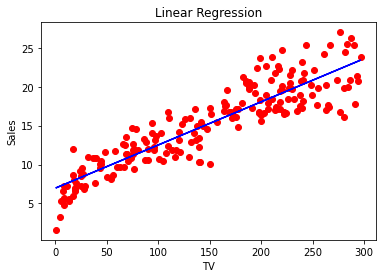

In [29]:
# visualization function - we could easily parameterize this to make it modular
def viz_linear():
    plt.scatter(X, y, color='red')
    # the predict function just returns the slope times x + intercept 
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('TV')
    plt.ylabel('Sales')
    plt.show()
    return

# run it    
viz_linear()

In [31]:
# we could also have just used the builtin function :) There are always many options
r_squared = lin_reg.score(X, y)
print(r_squared)

0.8121757029987414


In [33]:
# predicting a new result
level_to_estimate = 400
salary_estimate = lin_reg.predict([[level_to_estimate]])
print('With a linear regression model, a TV', level_to_estimate, 'should get a sale of $' ,salary_estimate[0])

With a linear regression model, a TV 400 should get a sale of $ 29.160729676053435


In [34]:
 # using numpy
a = np.array(df['TV'])
b = np.array(df['Sales'])

poly_model_np = np.poly1d(np.polyfit(a, b, 4))

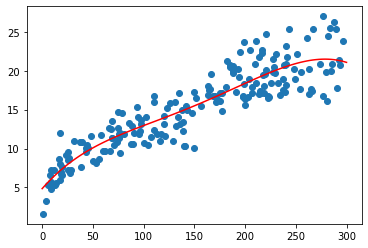

In [42]:
# visualization
import matplotlib.pyplot as plt

xp = np.linspace(0, 300, 100)
# plot data
plt.scatter(a, b)
# plot prediction line
plt.plot(xp, poly_model_np(xp), c='r')
plt.show()

In [44]:
# using scikit-learn
from sklearn.preprocessing import PolynomialFeatures
# create features object
poly_reg = PolynomialFeatures(degree=4)
# create feature matrix
X_poly = poly_reg.fit_transform(X)
# instantiate class instance
pol_reg = LinearRegression()
# fit (train) the model
pol_reg.fit(X_poly, y)

LinearRegression()

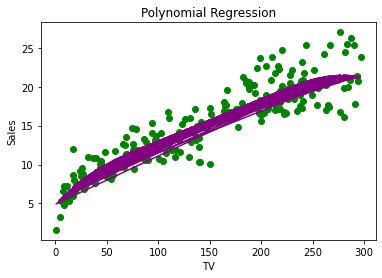

In [46]:
# polynomial visualization function
def viz_polymonial():
    plt.scatter(X, y, color='green')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='purple')
    plt.title('Polynomial Regression')
    plt.xlabel('TV')
    plt.ylabel('Sales')
    plt.show()
    return

# run it
viz_polymonial()

In [47]:
# do r_squared
r_squared = pol_reg.score(X_poly, y)
print(r_squared)

0.8262342200347604
